#### Pastor, P., Hoffmann, H., Asfour, T., & Schaal, S. (2009, May). Learning and generalization of motor skills by learning from demonstration. In 2009 IEEE International Conference on Robotics and Automation (pp. 763-768). IEEE.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy
np.set_printoptions(suppress=True)
from DMP import DMP

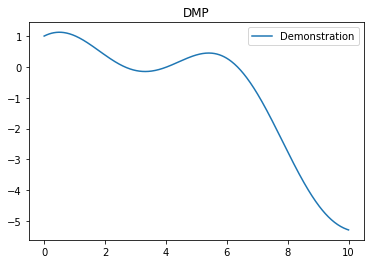

In [2]:
data_length = 500
duration = 10.0
time_step = duration / data_length
time = np.reshape(np.linspace(0, duration, num=data_length),
                  (data_length, 1))
a = np.cos(time)
b = -0.003 * (time ** 3) - 0.005 * (time ** 2) + 0.001 * time
x = np.sin(0.5 * time) + a + b
plt.plot(time, x, label='Demonstration')
plt.title('DMP')
plt.legend()
plt.show()

### Record a movement x(t) where time t = 1,...,T ( T=duration)

   - Take derivative of $x(t)$, scale by $\tau$ to get $v(t)$
   - Take derivative of $v(t)$ 

       - Movement: $x(t) = sin(0.5t) + cos(t) - 0.003t^3 -0.005t^2 + 0.001t$
        
       - Velocity: $v(t) = \frac{\partial x(t)}{\partial t} $
   
       - Acceleration: $\dot{v}(t) = \frac{\partial v(t)}{\partial t}$

### Calculate $f_{target}(s)$ by:

   - $f_{target}(s) = \frac{−K (g − x) + Dv + \tau \dot{v}}{g − x_{0}}$

   where $x_0=x(0)$ and $g=x(T)$
   
       
### DMP Formulations

   - Transformation system
         
       - $\tau \dot{v} = K (g − x) - Dv + (g − x_{0})f(s)$
              
       - $\tau \dot{x} = v$
       
   - Nonlinear Function
   
       - $f(s) = \frac{\sum_{i}{w_i\psi_i(s)s}}{\sum_{i}\psi_i(s)}$ with $\psi_i = exp(-h_i(s-c_i)^2)$
       
   - Canonical System
   
       - $\tau \dot{s}=-\alpha s$
       
       - $s(t) = exp(\frac{-\alpha}{\tau} t)$
       
### Integrate the canonical system
   - Choose $\alpha$ and integrate the canonical system for all time steps


 
### Minimize the squared error to find weights $w_i$

- Create $s(t)$ for all time steps t=1,...,T
- Select a number of Gaussian functions, as well as each Gaussian’s center and variance to derive $psi_i(s)$ from
- Find $f(s)$ in terms of unknown weights w i
- Finding $w_i$ is a linear regression problem



### Reproduce the movement
   - $\dot{v} = (K (g − x) - Dv + (g − x_{0})f(s)) / \tau$
              
   - $\tau \dot{x} = v$

In [3]:
time = time.flatten()
x = x.flatten()

tau = time[-1]

time_diff = np.diff(time, axis=0)
time_diff = np.insert(time_diff, 0, time_diff[0])

x_diff = np.diff(x, axis=0)
x_diff = np.insert(x_diff, x_diff.shape[0] - 1, x_diff[-1])
vel = (x_diff) / tau

vel_diff = np.diff(vel, axis=0)
vel_diff = np.insert(vel_diff, vel_diff.shape[0] - 1, vel_diff[-1])
acc = (vel_diff) / tau

In [4]:
K = 0.1
D = 0.8
alpha = 10
buffer_number = 20
x_0 = x[0]
g = x[data_length - 1]

dmp = DMP(x, vel, acc, time, K, D, alpha, tau)
dmp.set_initial_pos(x_0)
dmp.set_goal_pos(g)
dmp.set_f_target()
dmp.set_s()
dmp.set_basis_functions(buffer_number)
dmp.generate_psi()
dmp.set_f()
movement_5 = dmp.reproduce_movement()

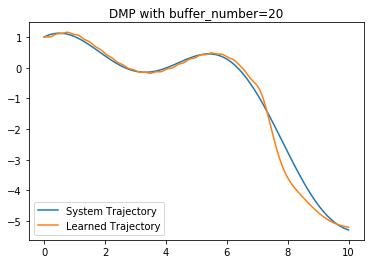

In [5]:
plt.plot(time, x, label='System Trajectory')
plt.plot(time, dmp.movement[:, 0], label='Learned Trajectory')
plt.title('DMP with buffer_number=%s' % buffer_number)
plt.legend()
plt.show()

In [6]:
new_x_0 = x_0 - 3.3
new_g = g - 1.8
new_time = np.linspace(0, duration * 1.5, num=data_length)
new_duration = duration * 1.5
new_tau = tau * 1.5
perturbation={'index':300, 'amount':5}

### For new initial positions

In [7]:
print('x_0: %s, new_x_0: %s' % (x_0,new_x_0))

x_0: 1.0, new_x_0: -2.3


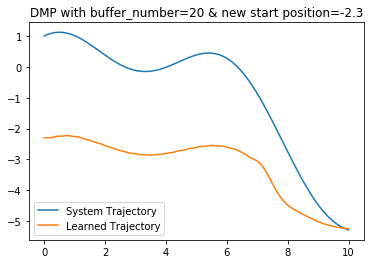

In [8]:
dmp.set_initial_pos(new_x_0)
dmp.set_goal_pos(g)
dmp.reproduce_movement()
plt.plot(time, x, label='System Trajectory')
plt.plot(time, dmp.movement[:, 0], label='Learned Trajectory')
plt.title('DMP with buffer_number=%s & new start position=%s' % (buffer_number, new_x_0))
plt.legend()
plt.show()

### For new final positions

In [9]:
print('g: %s, new_g: %s' % (g,new_g))

g: -5.287995803739591, new_g: -7.087995803739591


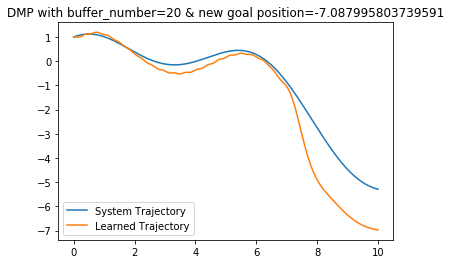

In [10]:
dmp.set_initial_pos(x_0)
dmp.set_goal_pos(new_g)
dmp.reproduce_movement()
plt.plot(time, x, label='System Trajectory')
plt.plot(time, dmp.movement[:, 0], label='Learned Trajectory')
plt.title('DMP with buffer_number=%s & new goal position=%s' % (buffer_number, new_g))
plt.legend()
plt.show()

### With different duration

In [11]:
print('dur: %s, new_dur: %s' % (duration,new_duration))

dur: 10.0, new_dur: 15.0


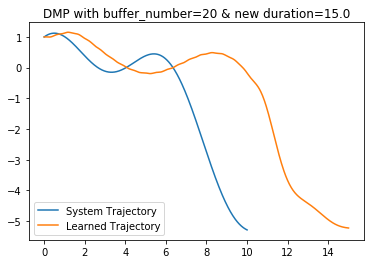

In [12]:
dmp.set_initial_pos(x_0)
dmp.set_goal_pos(g)
dmp.set_time(new_time)
dmp.set_tau(new_tau)
dmp.reproduce_movement()
plt.plot(time, x, label='System Trajectory')
plt.plot(new_time, dmp.movement[:, 0], label='Learned Trajectory')
plt.title('DMP with buffer_number=%s & new duration=%s' % (buffer_number, new_duration))
plt.legend()
plt.show()

### Perturbation

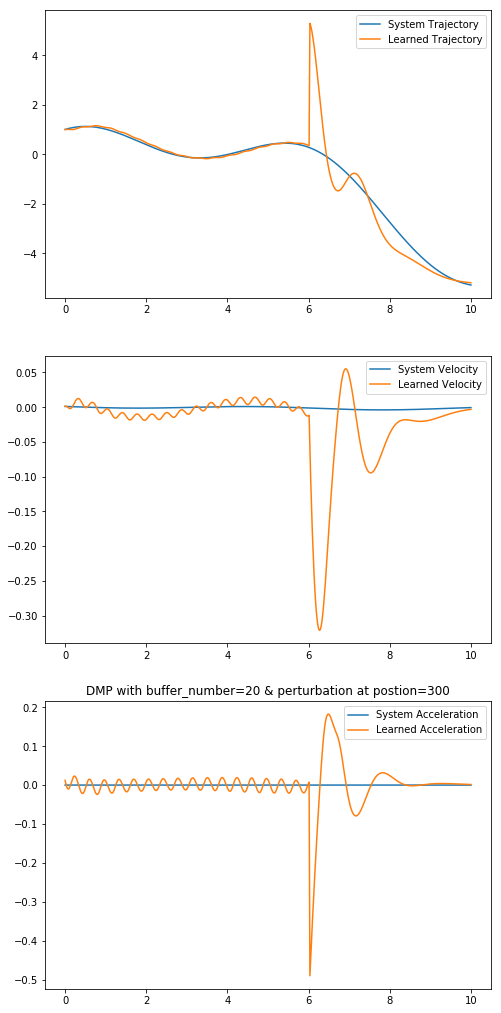

In [20]:
dmp.set_initial_pos(x_0)
dmp.set_goal_pos(g)
dmp.set_time(time)
dmp.set_tau(tau)
dmp.reproduce_movement(perturbation=perturbation)



fig = plt.figure(figsize=(8, 18)) 

ax = plt.subplot(3, 1, 1)
ax.plot(time, x, label='System Trajectory')
ax.plot(time, dmp.movement[:, 0], label='Learned Trajectory')
plt.legend()

ax2 = plt.subplot(3, 1, 2)
ax2.plot(time, vel, label='System Velocity')
ax2.plot(time, dmp.movement[:, 1], label='Learned Velocity')
plt.legend()

ax3 = plt.subplot(3, 1, 3)
ax3.plot(time, acc, label='System Acceleration')
ax3.plot(time, dmp.movement[:, 2], label='Learned Acceleration')

plt.title('DMP with buffer_number=%s & perturbation at postion=%s' % (buffer_number, perturbation['index']))
plt.legend()
plt.show()